<a href="https://colab.research.google.com/github/SaraAcet/Beslenme.php/blob/main/duyguanalizi_makine%C3%B6%C4%9Frenmesi_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneler
!pip install -U scikit-learn
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U nltk
!pip install -U tensorflow
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install -U plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# Google Drive'dan CSV dosyasını yükleme
data_path = '/content/drive/MyDrive/Classroom/duyguana/train.csv'
df = pd.read_csv(data_path)

# İlk 5 satırı görüntüleyelim
df.head()



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
print(df.columns)



Index(['id', 'label', 'tweet'], dtype='object')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK için gerekli verileri indir
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Lemmatizer ve stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Metin temizleme fonksiyonu
def clean_text(text):
    # Küçük harfe çevir
    text = text.lower()

    # HTML etiketlerini kaldır
    text = re.sub(r'<.*?>', '', text)

    # Sayıları ve noktalama işaretlerini kaldır
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Kelimeleri lemmatize et ve stopwords'ü çıkar
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text

# Veriyi temizle
df['cleaned_text'] = df['tweet'].apply(clean_text)

# Temizlenmiş veriyi göster
df[['tweet', 'cleaned_text']].head()





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tweet,cleaned_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF ile metni sayısal verilere dönüştürme
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

# Hedef değişken
y = df['label']  # 'label' olumlu/olumsuz sınıflarını içermeli



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Modeli oluşturma
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))  # Giriş katmanı
model.add(Dropout(0.5))  # Dropout (overfitting'i önlemek için)
model.add(Dense(64, activation='relu'))  # Gizli katman
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9310 - loss: 0.2867 - val_accuracy: 0.9498 - val_loss: 0.1328
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9597 - loss: 0.1061 - val_accuracy: 0.9562 - val_loss: 0.1245
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9721 - loss: 0.0774 - val_accuracy: 0.9570 - val_loss: 0.1233
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9792 - loss: 0.0597 - val_accuracy: 0.9553 - val_loss: 0.1311
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9846 - loss: 0.0471 - val_accuracy: 0.9568 - val_loss: 0.1430


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.84      0.48      0.61       456

    accuracy                           0.96      6393
   macro avg       0.90      0.73      0.79      6393
weighted avg       0.95      0.96      0.95      6393



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.56      0.55      0.55       456

    accuracy                           0.94      6393
   macro avg       0.76      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.33      0.49       456

    accuracy                           0.95      6393
   macro avg       0.94      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.35      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5937
           1       0.99      0.18      0.30       456

    accuracy                           0.94      6393
   macro avg       0.96      0.59      0.64      6393
weighted avg       0.94      0.94      0.92      6393



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model sonuçlarını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.9413420929141249
Precision: 0.9879518072289156
Recall: 0.17982456140350878
F1 Score: 0.3042671614100185
ROC-AUC: 0.5898280630834286


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model performanslarını depolamak için liste
results = []

# Model isimleri ve sonuçlarını hesaplama
models = {
    "SVM": svm,
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "Logistic Regression": lr,
    "KNN": knn,
    "YSA": model  # YSA modelini de ekliyoruz
}

# Tahminlerin binary hale getirilmesi için threshold uygulama
threshold = 0.5

for model_name, model in models.items():
    # Tahmin yapalım
    if hasattr(model, 'predict_proba'):  # Eğer model predict_proba fonksiyonuna sahipse
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilistic tahmin (sadece pozitif sınıf için)
        # Binary tahminler için threshold uygulayalım
        y_pred = (y_pred_prob > threshold).astype(int)  # Eğer prob > 0.5 ise 1, yoksa 0
    else:
        # For models without predict_proba (like the Keras model), use predict and apply threshold:
        y_pred = model.predict(X_test)  # If no predict_proba, use predict
        y_pred = (y_pred > threshold).astype(int) # Apply threshold for binary classification

    # Metrikleri hesaplayalım
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC, probabilistik tahminler ile hesaplanır (y_pred_prob zaten olasılık olduğu için kullanılabilir)
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, y_pred_prob)  # ROC AUC, probabilistik tahminler ile hesaplanır
    else:
        # For models without predict_proba, calculate ROC-AUC using raw predictions:
        roc_auc = roc_auc_score(y_test, y_pred)

    # Sonuçları listeye ekleyelim
    results.append([accuracy, precision, recall, f1, roc_auc])

# DataFrame'e dönüştürme
results_df = pd.DataFrame(results, columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"], index=models.keys())

# Tabloyu yazdırma
print("Model Performans Metrikleri:")
print(results_df)



200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model Performans Metrikleri:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
SVM                  0.956359   0.844358  0.475877  0.608696  0.734570
Decision Tree        0.936806   0.557778  0.550439  0.554084  0.764852
Naive Bayes          0.950415   0.926380  0.331140  0.487884  0.939277
Logistic Regression  0.951197   0.913793  0.348684  0.504762  0.948674
KNN                  0.941342   0.987952  0.179825  0.304267  0.720121
YSA                  0.982481   0.896313  0.853070  0.874157  0.922745


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model performanslarını depolamak için liste
results = []

# Model isimleri ve sonuçlarını hesaplama
models = {
    "SVM": svm,
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "Logistic Regression": lr,
    "KNN": knn,
    "YSA": model  # YSA modelini de ekliyoruz
}

# Tahminlerin binary hale getirilmesi için threshold uygulama
threshold = 0.5

for model_name, model in models.items():
    # Tahmin yapalım
    if hasattr(model, 'predict_proba'):  # Eğer model predict_proba fonksiyonuna sahipse
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilistic tahmin (sadece pozitif sınıf için)
        # Binary tahminler için threshold uygulayalım
        y_pred = (y_pred_prob > threshold).astype(int)  # Eğer prob > 0.5 ise 1, yoksa 0
    else:
        # For models without predict_proba (like the Keras model), use predict and apply threshold:
        y_pred = model.predict(X_test)  # If no predict_proba, use predict
        y_pred = (y_pred > threshold).astype(int) # Apply threshold for binary classification

    # Metrikleri hesaplayalım
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC, probabilistik tahminler ile hesaplanır (y_pred_prob zaten olasılık olduğu için kullanılabilir)
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, y_pred_prob)  # ROC AUC, probabilistik tahminler ile hesaplanır
    else:
        # For models without predict_proba, calculate ROC-AUC using raw predictions:
        roc_auc = roc_auc_score(y_test, y_pred)

    # Sonuçları listeye ekleyelim
    results.append([accuracy, precision, recall, f1, roc_auc])

# DataFrame'e dönüştürme
results_df = pd.DataFrame(results, columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"], index=models.keys())

# Tabloyu yazdırma
print("Model Performans Metrikleri:")
print(results_df)



200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model Performans Metrikleri:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
SVM                  0.956359   0.844358  0.475877  0.608696  0.734570
Decision Tree        0.936806   0.557778  0.550439  0.554084  0.764852
Naive Bayes          0.950415   0.926380  0.331140  0.487884  0.939277
Logistic Regression  0.951197   0.913793  0.348684  0.504762  0.948674
KNN                  0.941342   0.987952  0.179825  0.304267  0.720121
YSA                  0.982481   0.896313  0.853070  0.874157  0.922745


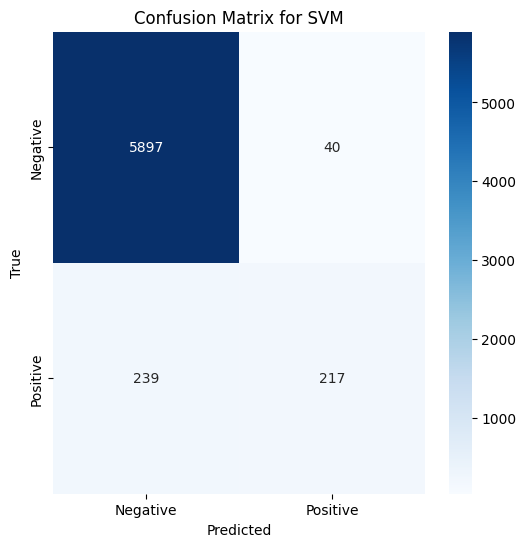

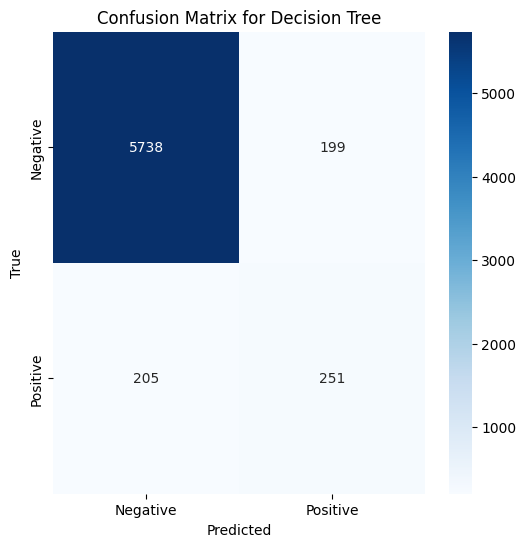

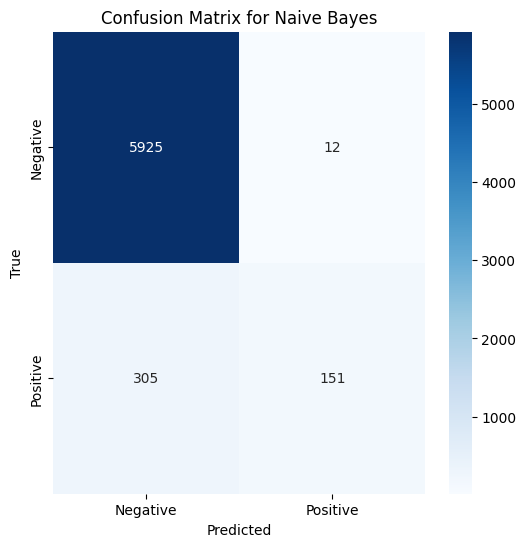

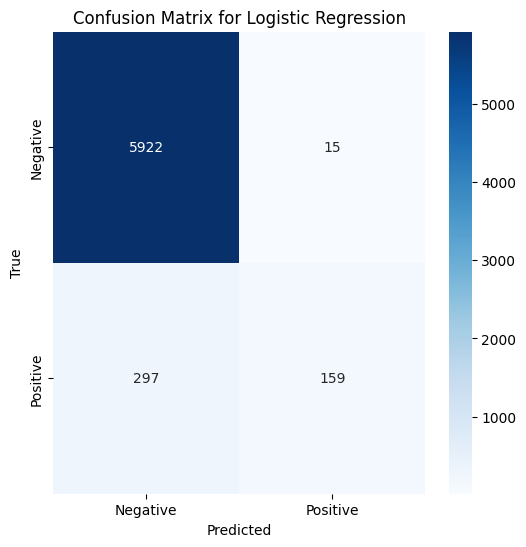

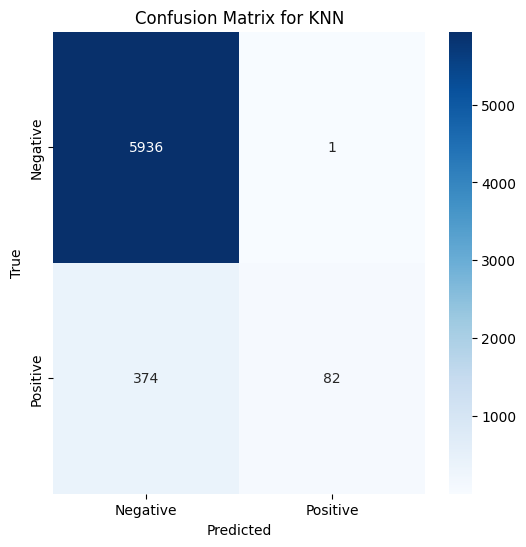

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


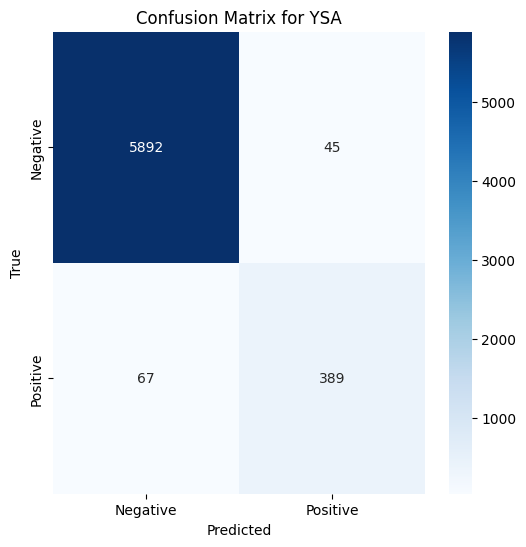

In [ ]:
"""

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (karışıklık matrisi )')
plt.show()

"""




import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini hesaplamak ve görselleştirmek için model isimlerini ve tahminleri içeren bir sözlük oluşturuyoruz
models = {
    "SVM": svm,
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "Logistic Regression": lr,
    "KNN": knn,
    "YSA": model  # YSA modelini de ekliyoruz
}

# Her model için karışıklık matrisini hesaplayalım
for model_name, model in models.items():
    # Tahmin yapalım
    if hasattr(model, 'predict_proba'):  # Eğer model predict_proba fonksiyonuna sahipse
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilistic tahmin (sadece pozitif sınıf için)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Binary tahminler için threshold uygulayalım
    else:
        # For models without predict_proba (like the Keras model), use predict and apply threshold:
        y_pred = model.predict(X_test)  # If no predict_proba, use predict
        y_pred = (y_pred > 0.5).astype(int)  # Apply threshold for binary classification

    # Karışıklık matrisini hesaplayalım
    cm = confusion_matrix(y_test, y_pred)

    # Karışıklık matrisini görselleştirelim
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


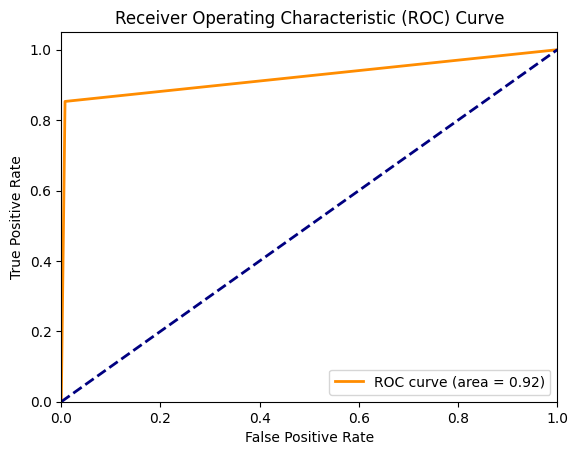

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:




# Yeni cümle
new_tweet = "I love this new song!"

# 1. Adım: Metni temizleyelim
cleaned_new_tweet = clean_text(new_tweet)

# 2. Adım: Temizlenmiş metni TF-IDF ile dönüştürelim
new_tweet_tfidf = vectorizer.transform([cleaned_new_tweet])

# 3. Adım: Modeli kullanarak tahmin yapalım
sentiment = model.predict(new_tweet_tfidf)

# 4. Adım: Sonuçları yazdıralım
if sentiment == 1:
    print("Sentiment: Positive")  # Olumlu
else:
    print("Sentiment: Negative")  # Olumsuz


#new_tweet = "I hate waiting in line!"  # Olumsuz bir cümle
#new_tweet = "I love this new song!"  # Olumlu bir cümle




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Sentiment: Negative


In [ ]:
# Örneğin, SVM modeli ile test etmek
sentiment_svm = svm.predict(new_tweet_tfidf)
if sentiment_svm == 1:
    print("SVM Sentiment: Positive")
else:
    print("SVM Sentiment: Negative")


SVM Sentiment: Negative
